In [1]:
import numpy as np
import pandas as pd
import plotly.express as px # Interactive charts and save some coding; .express - high-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change settings to improve default style (optional)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
data_path = r'/workspaces/bigdata/raw_data/medical-charges.csv'

In [4]:

medical_df = pd.read_csv(data_path)

In [5]:
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

0.2990081933306476
0.19834096883362878
0.06799822684790469


In [9]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
print(medical_df['charges'].corr(smoker_numeric))

0.7872514304984782


In [10]:

medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


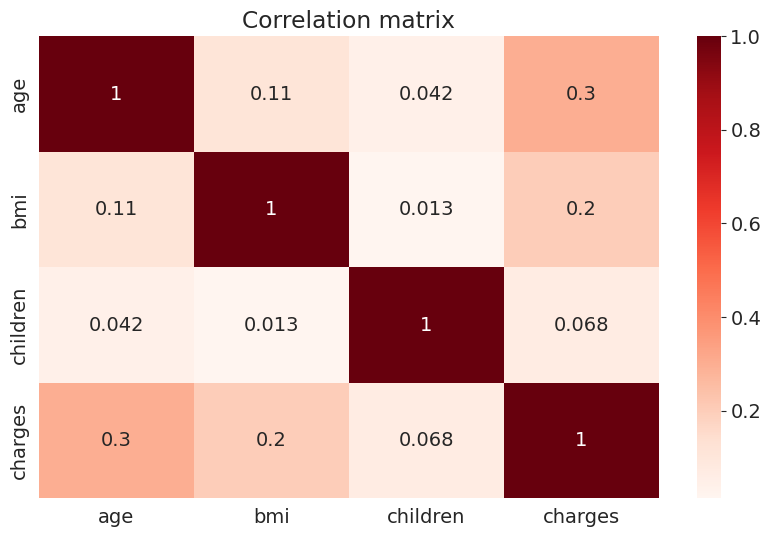

In [11]:
sns.heatmap(
    medical_df.select_dtypes(include='number').corr(),
    cmap='Reds',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

In [12]:

from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [15]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] # Either line will work. Just different syntaxes; But I like no 1 more.
non_smoker_df.head(3)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [16]:
inputs = non_smoker_df[['age']] # required to be 2D array. We want a dataframe, not a series.
targets = non_smoker_df['charges'] # There is only one dependent variable => no 2D notation is required.
print("Inputs shape", inputs.shape) # Output: (1064, 1) -> First number is how many lines; 2nd number is how many columns.
print("targets", targets.shape)

Inputs shape (1064, 1)
targets (1064,)


In [17]:
model.fit(inputs, targets)

LinearRegression()

In [18]:
model.predict(np.array([
    [23],
    [37],
    [61]
]))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [19]:
predictions = model.predict(inputs)
print(predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [20]:
def rmse(targets, predictions):
    """
    Returns RMSE for targets and prediction values.
    """
    return np.sqrt(np.mean(np.square(predictions - targets)))

In [22]:
print(rmse(targets, predictions))

4662.505766636395


In [23]:
# w:
print(model.coef_)
# b:
print(model.intercept_)

[267.24891283]
-2091.4205565650864
